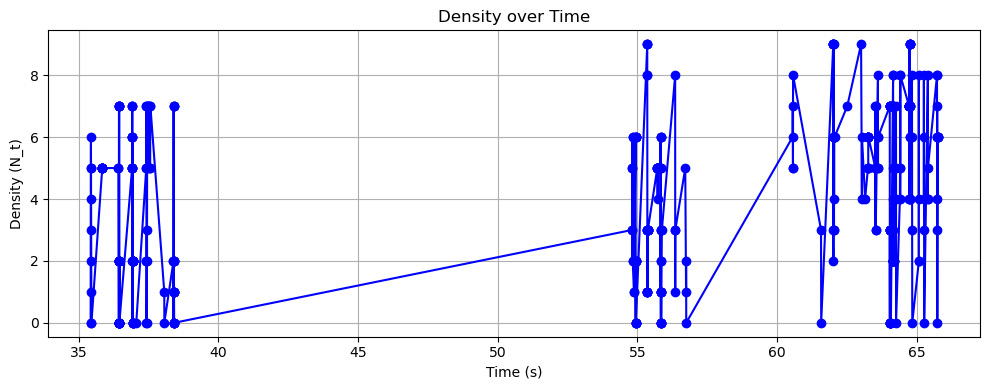

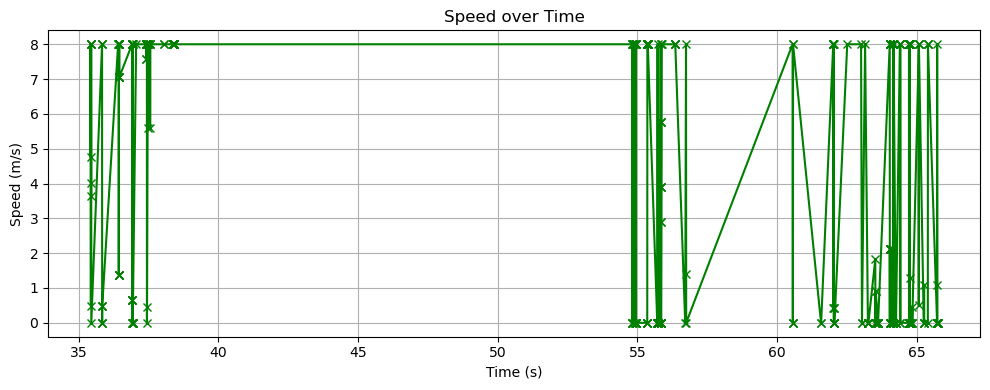

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 로드
df = pd.read_csv("rrep_art_dpc_log.csv")
df = df.sort_values(by="Time")

# 그래프 1: 시간 vs 밀도
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["N_t"], label="Density (N_t)", color='blue', marker='o', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Density (N_t)")
plt.title("Density over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 2: 시간 vs 속력
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["Speed"], label="Speed (m/s)", color='green', marker='x', linestyle='-')
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Speed over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


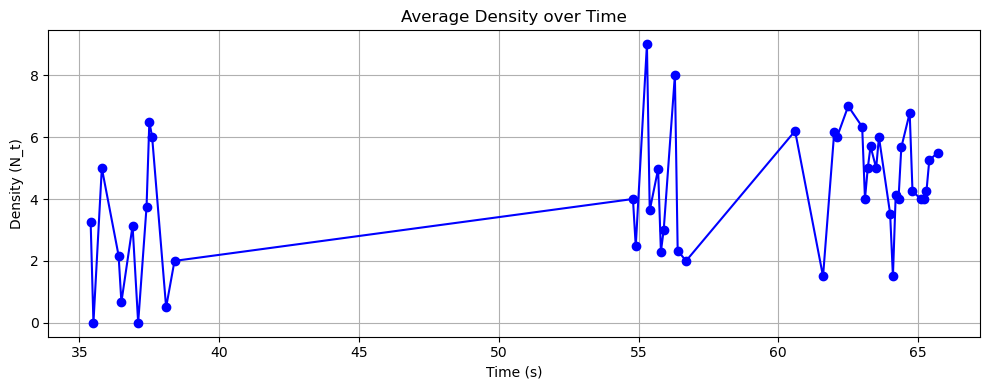

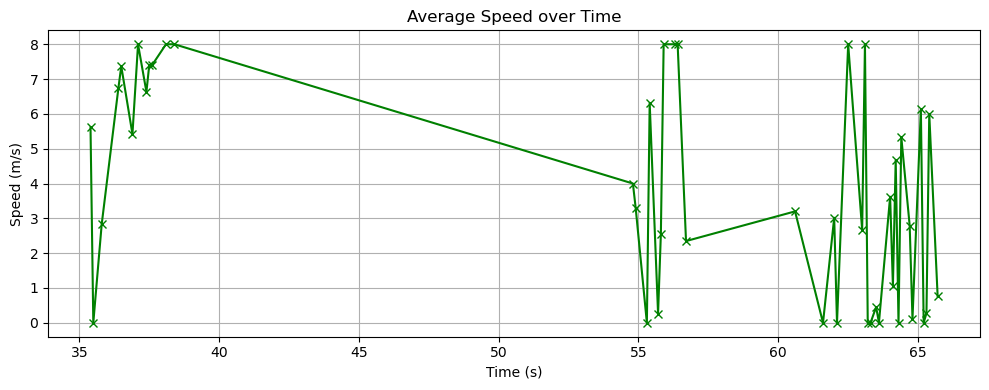

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("rrep_art_dpc_log.csv")

# 시간 값이 소수점일 경우, 소수점 둘째 자리까지 반올림
df["Time"] = df["Time"].round(1)

# 시간 단위로 그룹화하여 평균 계산
grouped = df.groupby("Time").agg({"N_t": "mean", "Speed": "mean"}).reset_index()

# 그래프 1: 밀도
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["N_t"], marker='o', linestyle='-', color='blue', label="Density (N_t)")
plt.xlabel("Time (s)")
plt.ylabel("Density (N_t)")
plt.title("Average Density over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 2: 속도
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["Speed"], marker='x', linestyle='-', color='green', label="Speed (m/s)")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Average Speed over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


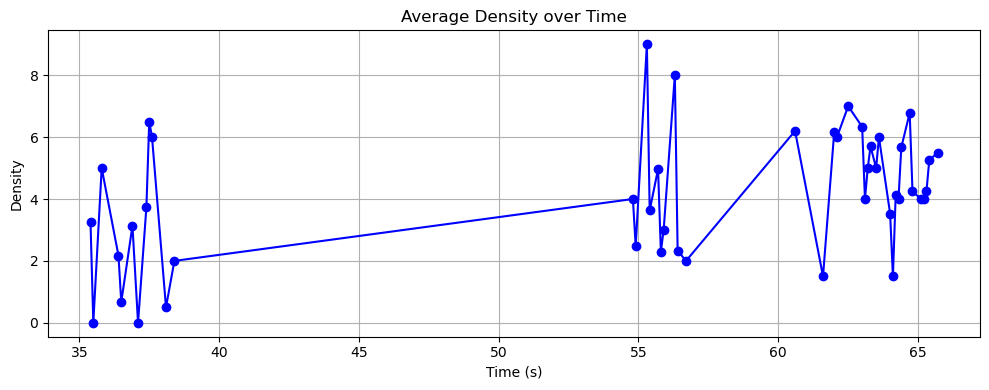

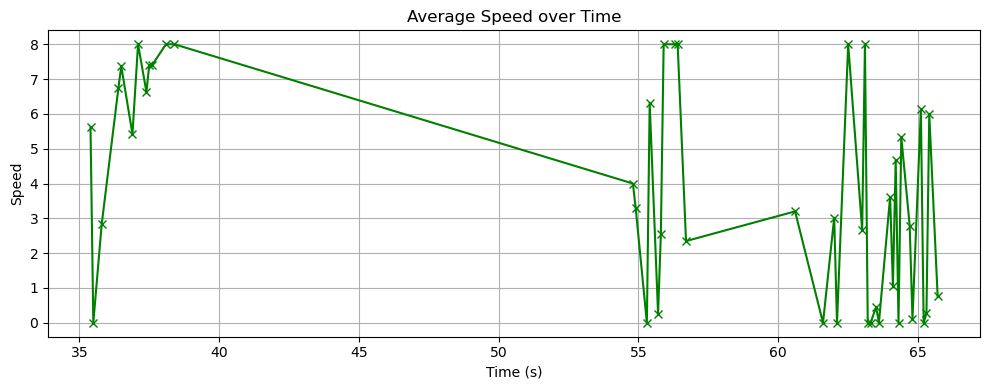

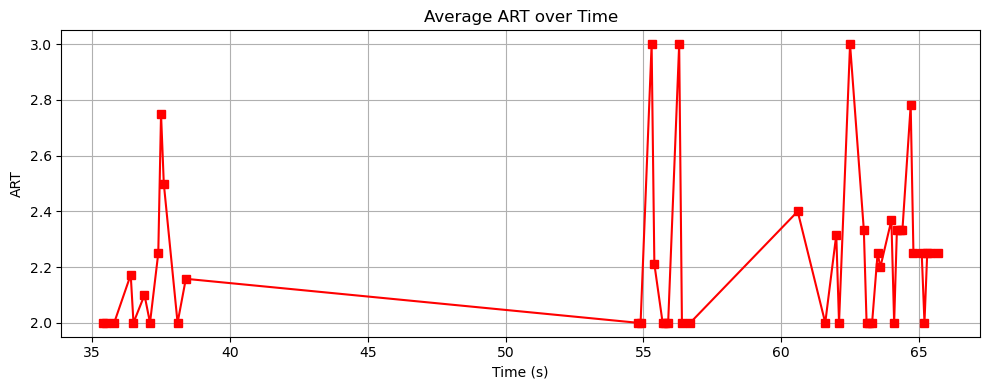

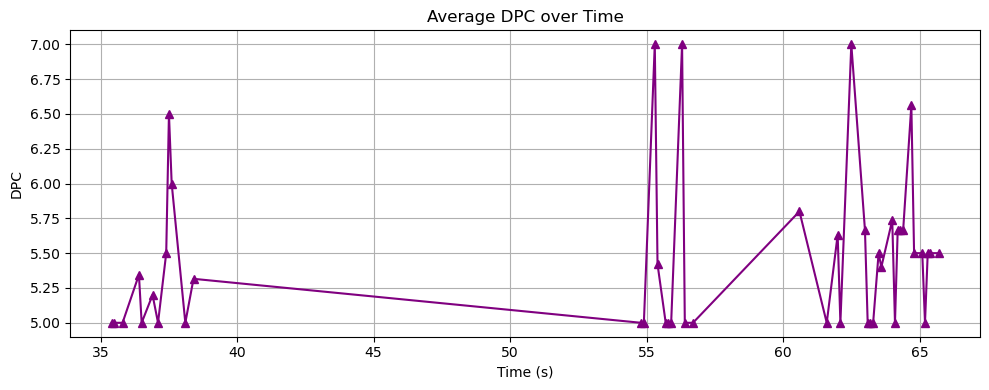

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 로드
df = pd.read_csv("rrep_art_dpc_log.csv")

# 시간 값을 반올림하여 그룹화 단위 맞추기
df["Time"] = df["Time"].round(1)

# 시간별 평균 계산
grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

# 그래프 1: 밀도
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["N_t"], marker='o', linestyle='-', color='blue', label="Density (N_t)")
plt.xlabel("Time (s)")
plt.ylabel("Density")
plt.title("Average Density over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 2: 속력
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["Speed"], marker='x', linestyle='-', color='green', label="Speed (m/s)")
plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.title("Average Speed over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 3: ART
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["ART"], marker='s', linestyle='-', color='red', label="ART")
plt.xlabel("Time (s)")
plt.ylabel("ART")
plt.title("Average ART over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 4: DPC
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["DPC"], marker='^', linestyle='-', color='purple', label="DPC")
plt.xlabel("Time (s)")
plt.ylabel("DPC")
plt.title("Average DPC over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


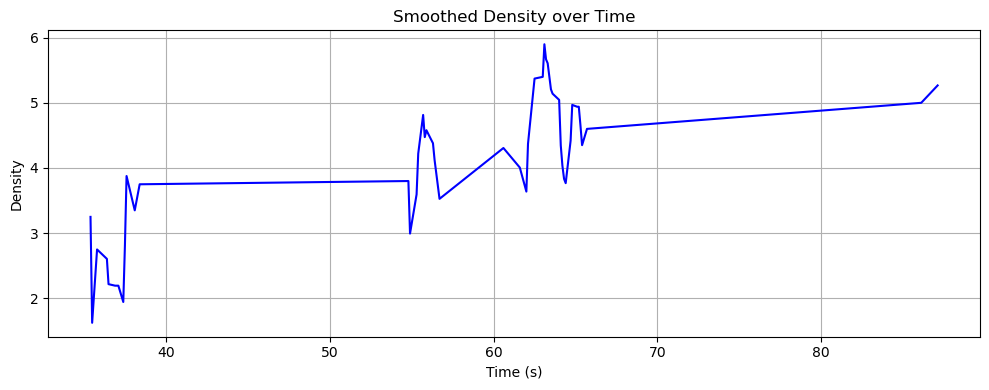

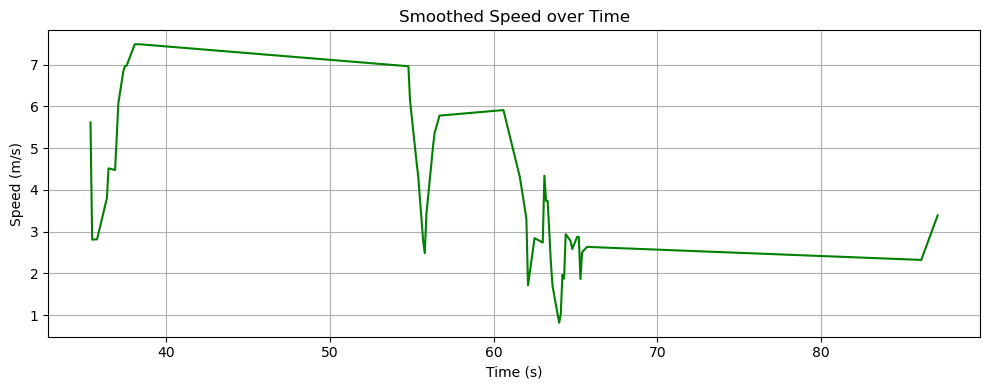

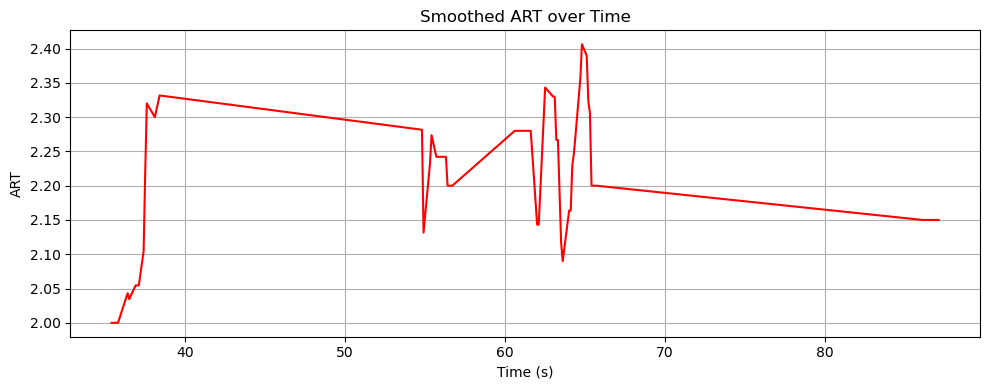

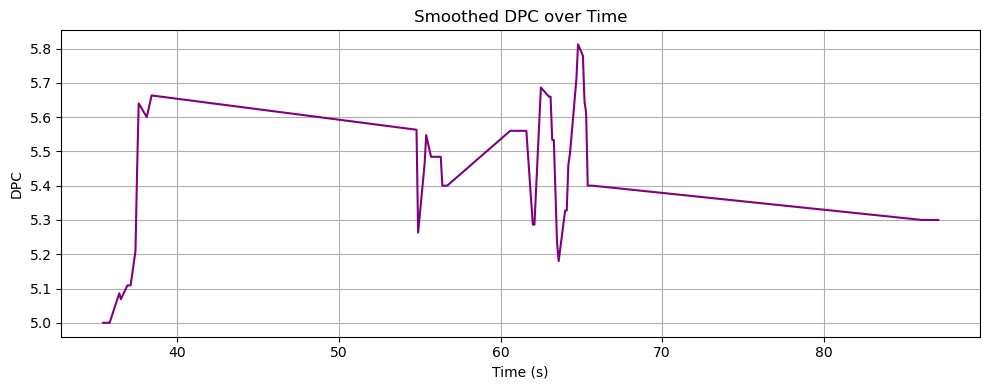

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv("rrep_art_dpc_log.csv")

# 시간 값을 반올림하여 그룹화
df["Time"] = df["Time"].round(1)

# 시간별 평균 계산
grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

# 이동 평균 적용 (window=5)
grouped["N_t_smooth"] = grouped["N_t"].rolling(window=5, min_periods=1).mean()
grouped["Speed_smooth"] = grouped["Speed"].rolling(window=5, min_periods=1).mean()
grouped["ART_smooth"] = grouped["ART"].rolling(window=5, min_periods=1).mean()
grouped["DPC_smooth"] = grouped["DPC"].rolling(window=5, min_periods=1).mean()

# 그래프 1: 밀도
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["N_t_smooth"], color='blue', label="Density (smoothed)")
plt.xlabel("Time (s)")
plt.ylabel("Density")
plt.title("Smoothed Density over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 2: 속력
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["Speed_smooth"], color='green', label="Speed (smoothed)")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.title("Smoothed Speed over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 3: ART
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["ART_smooth"], color='red', label="ART (smoothed)")
plt.xlabel("Time (s)")
plt.ylabel("ART")
plt.title("Smoothed ART over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 그래프 4: DPC
plt.figure(figsize=(10, 4))
plt.plot(grouped["Time"], grouped["DPC_smooth"], color='purple', label="DPC (smoothed)")
plt.xlabel("Time (s)")
plt.ylabel("DPC")
plt.title("Smoothed DPC over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


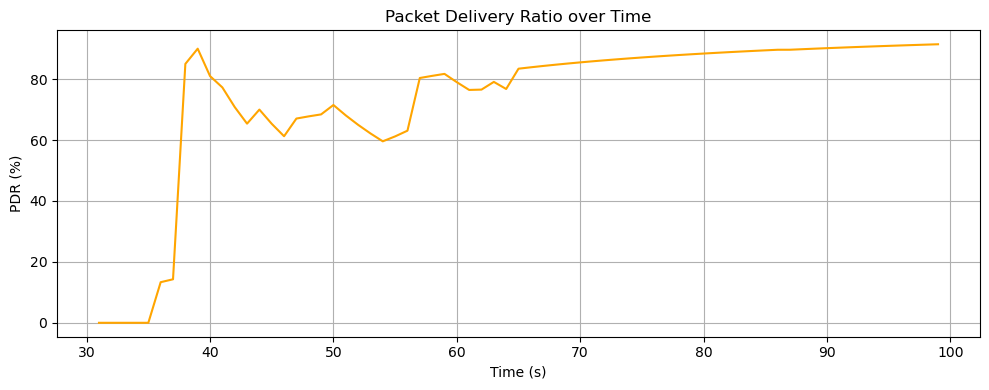

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# PDR.txt 파일 읽기
pdr_data = {}
with open("PDR.txt", "r") as f:
    for line in f:
        if ":" in line:
            time_str, val_str = line.strip().split(":")
            time = int(time_str.strip())
            try:
                value = float(val_str.strip())
                pdr_data[time] = value
            except ValueError:
                continue  # NaN은 아예 건너뜀

# 데이터프레임으로 변환
df = pd.DataFrame(list(pdr_data.items()), columns=["Time", "PDR"])
df = df.sort_values("Time")

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["PDR"], linestyle='-', color='orange', label="PDR (%)")
plt.xlabel("Time (s)")
plt.ylabel("PDR (%)")
plt.title("Packet Delivery Ratio over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


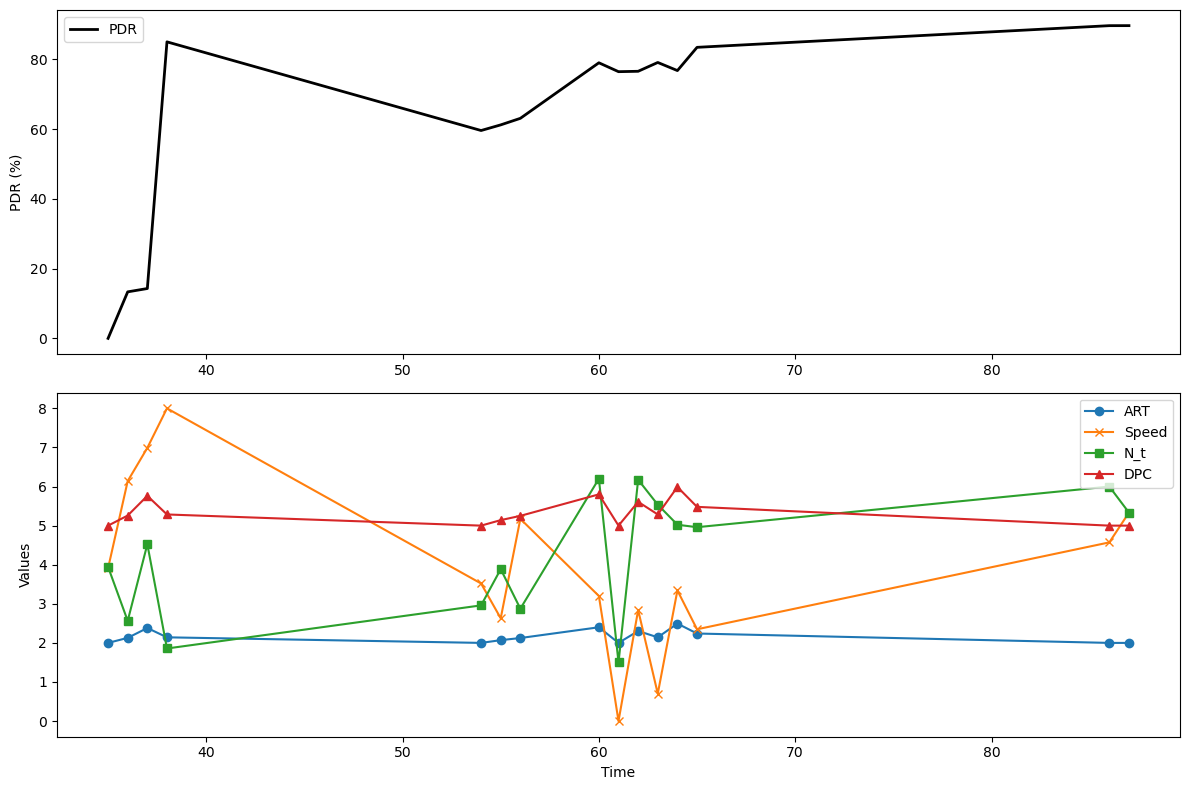

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ART/DPC 로그 처리
df = pd.read_csv("rrep_art_dpc_log.csv")
df["Time"] = df["Time"].astype(float).astype(int)
grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

# PDR 처리
pdr_data = []
with open("PDR.txt", "r") as f:
    for line in f:
        if ":" in line:
            t, val = line.strip().split(":")
            if val.strip().lower() != "nan":
                pdr_data.append((int(t.strip()), float(val.strip())))

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])

# merge
merged = pd.merge(grouped, pdr_df, on="Time", how="inner")

# 그래프
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(merged["Time"], merged["PDR"], label="PDR", color="black", linewidth=2)
plt.ylabel("PDR (%)")
plt.legend()

plt.subplot(2,1,2)
plt.plot(merged["Time"], merged["ART"], label="ART", marker='o')
plt.plot(merged["Time"], merged["Speed"], label="Speed", marker='x')
plt.plot(merged["Time"], merged["N_t"], label="N_t", marker='s')
plt.plot(merged["Time"], merged["DPC"], label="DPC", marker='^')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()


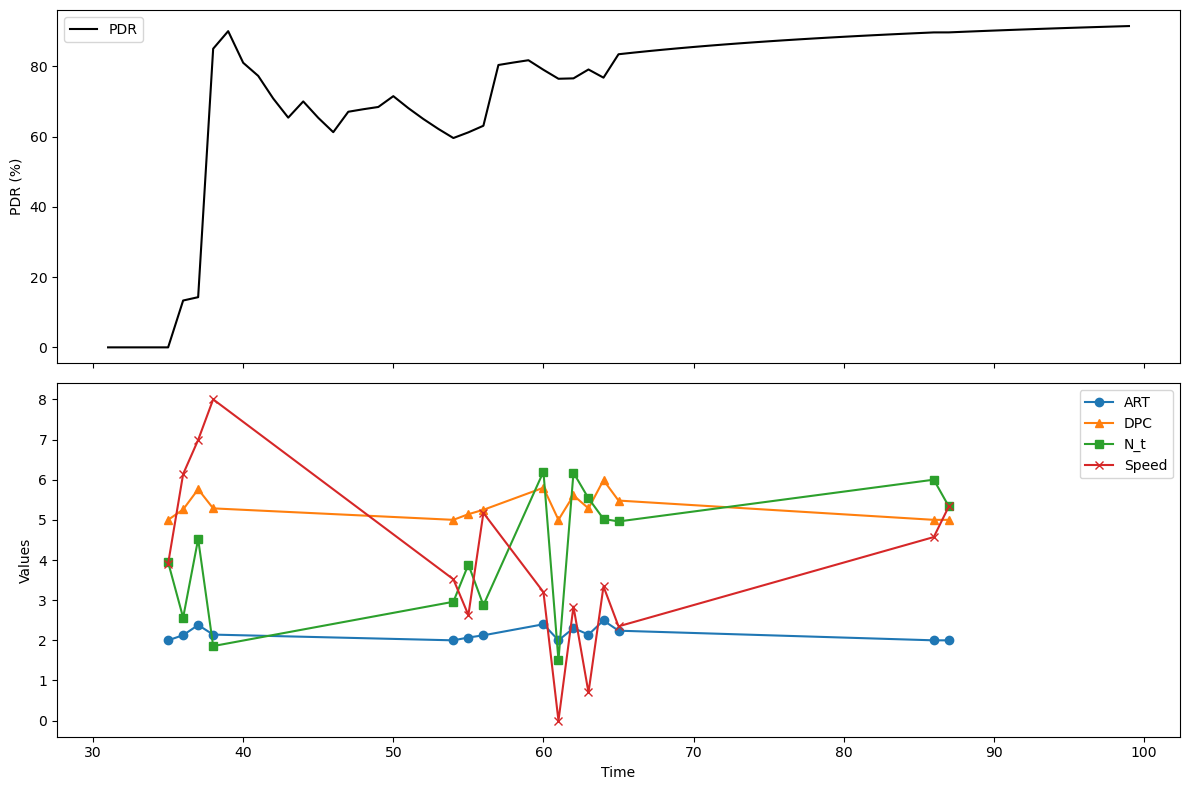

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# PDR.txt 불러오기
pdr_data = []
with open("PDR.txt", "r") as f:
    for line in f:
        if ":" in line:
            time_str, pdr_str = line.strip().split(":")
            try:
                time = int(time_str.strip())
                pdr = float(pdr_str.strip())
                pdr_data.append((time, pdr))
            except:
                continue

pdr_df = pd.DataFrame(pdr_data, columns=["Time", "PDR"])
pdr_df = pdr_df.sort_values("Time")

# rrep_art_dpc_log.csv 불러오기
df = pd.read_csv("rrep_art_dpc_log.csv")
df["Time"] = df["Time"].astype(int)

# 시간 단위 평균만 계산 (필터링/전처리 없이)
grouped = df.groupby("Time").agg({
    "N_t": "mean",
    "Speed": "mean",
    "ART": "mean",
    "DPC": "mean"
}).reset_index()

# 시각화
fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

# PDR 그래프
axes[0].plot(pdr_df["Time"], pdr_df["PDR"], color="black", label="PDR")
axes[0].set_ylabel("PDR (%)")
axes[0].legend()

# ART, DPC, N_t, Speed 그래프
axes[1].plot(grouped["Time"], grouped["ART"], marker="o", label="ART")
axes[1].plot(grouped["Time"], grouped["DPC"], marker="^", label="DPC")
axes[1].plot(grouped["Time"], grouped["N_t"], marker="s", label="N_t")
axes[1].plot(grouped["Time"], grouped["Speed"], marker="x", label="Speed")
axes[1].set_ylabel("Values")
axes[1].set_xlabel("Time")
axes[1].legend()

plt.tight_layout()
plt.show()
